In [2]:
#Week 9 / Day 4 - Mini Project (Car Sales)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

# Load dataset (adjust filename/path as needed)
cars = pd.read_csv("USA_cars_datasets.csv")

print(cars.shape)
print(cars.columns)
print(cars.info())
print(cars.head())


Saving USA_cars_datasets.csv to USA_cars_datasets (1).csv
(2499, 13)
Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: fl

In [21]:
#Cleaning - Exploratory Data Analysis

cars_clean = cars.copy()
print(cars.isnull().sum()) #confirm how many are null
print(cars_clean.dtypes) #confirm data types

cars_clean = cars_clean.dropna()

categories = ["brand", "model", "title_status", "color", "state", "country"] #change to category
for col in categories:
    cars_clean[col] = cars_clean[col].astype("category")


cars_clean.dtypes

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64
Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object


,0
Unnamed: 0,int64
price,int64
brand,category
model,category
year,int64
title_status,category
mileage,float64
color,category
vin,object
lot,int64


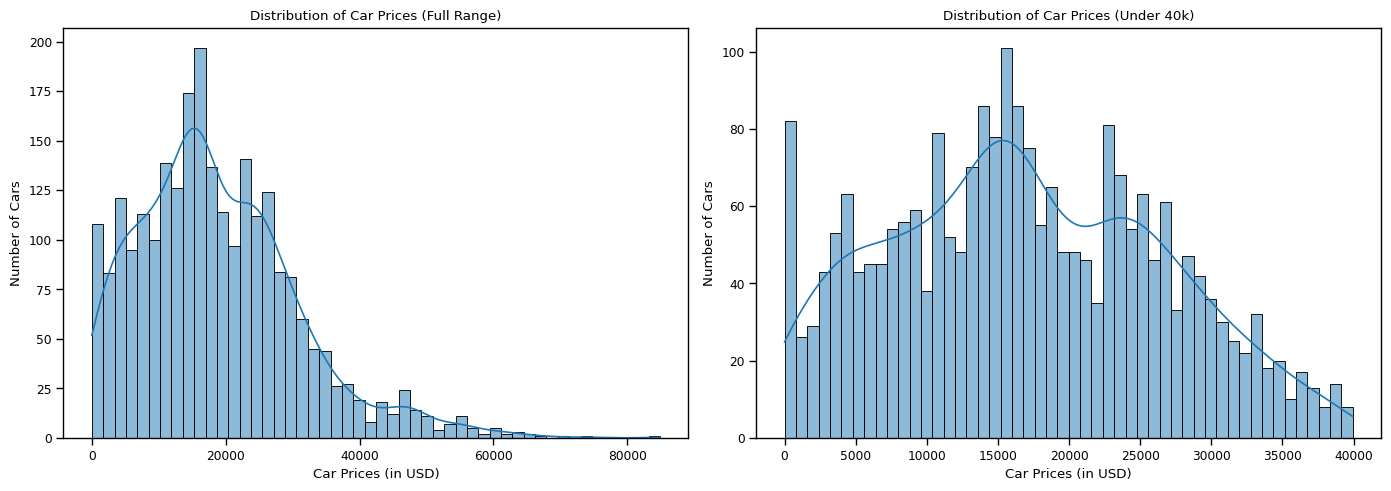

In [34]:
#Create a histogram showing the distribution of car prices.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Full range histogram
sns.histplot(cars_clean['price'], bins=50, kde=True, ax=axes[0])
sns.set_context('paper')
axes[0].set_title('Distribution of Car Prices (Full Range)')
axes[0].set_xlabel('Car Prices (in USD)')
axes[0].set_ylabel('Number of Cars')

# Zoomed-in histogram (e.g., < 40k)
sns.histplot(cars_clean[cars_clean['price'] < 40000]['price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Car Prices (Under 40k)')
axes[1].set_xlabel('Car Prices (in USD)')
axes[1].set_ylabel('Number of Cars')

plt.tight_layout()
plt.show()


/tmp/ipython-input-2927578092.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ford', 'dodge', 'ford', 'chevrolet', 'dodge', ..., 'nissan', 'nissan', 'nissan', 'nissan', 'nissan']
Length: 2411
Categories (10, object): ['bmw', 'chevrolet', 'chrysler', 'dodge', ..., 'hyundai', 'jeep', 'kia',
                          'nissan']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  cars_top.loc[:, 'brand'] = cars_top['brand'].cat.remove_unused_categories() #added because seaborn showed unused (28)
/tmp/ipython-input-2927578092.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='price', data=cars_top, palette="Set3",showfliers=False) #don't show outliers


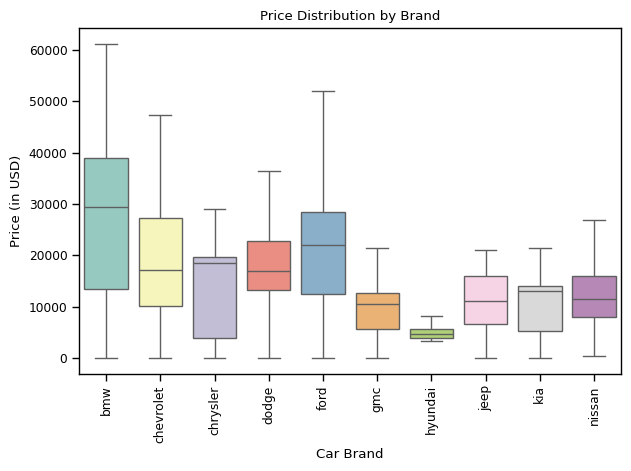

In [45]:
#Create a box plot showing price distribution by brand (top 10 brands).


top_brands = cars_clean['brand'].value_counts().nlargest(10).index
cars_top = cars_clean[cars_clean['brand'].isin(top_brands)]


cars_top.loc[:, 'brand'] = cars_top['brand'].cat.remove_unused_categories() #added because seaborn showed unused (28)

# Creating a box plot
sns.boxplot(x='brand', y='price', data=cars_top, palette="Set3",showfliers=False) #don't show outliers
plt.title('Price Distribution by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price (in USD)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [67]:
#Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.

import plotly.express as px
from plotnine import ggplot, aes, geom_point


condcount = cars_clean["condition"].value_counts()

# Find the frequent ones (20 or more)
common_conditions = condcount[condcount >= 20].index

cars_filtered = cars_clean[cars_clean["condition"].isin(common_conditions) & (cars_clean["mileage"] < 350000) & (cars_clean["price"] < 60000)]
fig = px.scatter(cars_filtered, x="price", y="mileage", color="condition")
fig.update_layout(title='Cars: Price vs. Mileage',
                  xaxis_title='Car Price',
                  yaxis_title='Mileage',
                  template='plotly_dark')
fig.show()




In [65]:
cars_clean["condition"].value_counts() #checking to decide what to filter out.


,count
condition,
2 days left,832
21 hours left,492
3 days left,137
14 hours left,108
1 days left,91
8 days left,82
17 hours left,76
20 hours left,67
9 days left,58


In [85]:
#Optional : create a heatmap of average prices by brand and condition.

average_brand = cars_clean.groupby("brand")["price"].mean().round(0).astype(int)


def bucket_condition(c):
    c = str(c).lower()

    if "expired" in c:
        return "Expired"

    elif "minute" in c:
        return "Less than one hour remaining"

    elif "hour" in c:
        num = int(c.split()[0])  # number before "hours"
        if 1 <= num <= 12:
            return "<12 hours"
        elif 13 <= num <= 24:
            return "13–24 hours"
        else:
            return ">24 hours"

    elif "day" in c:
        num = int(c.split()[0])  # number before "days"
        if num == 1:
            return "1 day left"
        elif 2 <= num <= 5:
            return "2–5 days left"
        elif num >= 7:
            return "7+ days left"
        else:
            return "Other"

    else:
        return "Other"


cars_clean["cond_bucket"] = cars_clean["condition"].apply(bucket_condition)

average_condition = cars_clean.groupby("cond_bucket")["price"].mean().round(0).astype(int)

time_mapping = {
    "Expired": 0,                               # no time left
    "Less than one hour remaining": 0.5,        # ~30 minutes
    "<12 hours": 6,                             # midpoint
    "13–24 hours": 18,                          # midpoint
    ">24 hours": 30,                            # say ~30 hours
    "1 day left": 24,                           # exactly 1 day
    "2–5 days left": 84,                        # midpoint (3.5 days)
    "7+ days left": 168                         # one week
}

cars_clean["hours_left"] = cars_clean["cond_bucket"].map(time_mapping)

correlation_matrix = cars_clean[["hours_left", "average_brand"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Time Left vs Price")
plt.show()


/tmp/ipython-input-3887612212.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



KeyError: "['average_brand'] not in index"

In [84]:
corr = cars_clean[["hours_left","brand"]].dropna().corr()
plt.figure(figsize=(3,3))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
    cbar=False, square=True, annot_kws={"size":12}
)
plt.title("Average Price by Brand and Condition", pad=10)
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'toyota'